<a href="https://colab.research.google.com/github/gianmarco-holm/SpotifyHits_DescriptiveStats/blob/main/SpotifyHits_DescriptiveStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook de Análsis Estadístico Descriptivo de los Hits de Spotify

## Instalando Librerías

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import linear_model
from sklearn.decomposition import PCA

## Extracción de Información

In [21]:
df = pd.read_csv('./data/Popular_Spotify_Songs.csv', encoding='latin1')

In [22]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Estructura de la data:

1. **track_name**: El nombre de la canción.
2. **artist(s)_name**: El nombre del artista o artistas que interpretan la canción.
3. **artist_count**: La cantidad de artistas que participan en la canción.
4. **released_year**: El año en que se lanzó la canción.
5. **released_month**: El mes en que se lanzó la canción.
6. **released_day**: El día en que se lanzó la canción.
7. **in_spotify_playlists**: Indica si la canción está presente en listas de reproducción de Spotify.
8. **in_spotify_charts**: Indica si la canción está presente en las listas de éxitos de Spotify.
9. **streams**: La cantidad de transmisiones que ha tenido la canción.
10. **in_apple_playlists**: Indica si la canción está presente en listas de reproducción de Apple Music.
11. **in_apple_charts**: Indica si la canción está presente en las listas de éxitos de Apple Music.
12. **in_deezer_playlists**: Indica si la canción está presente en listas de reproducción de Deezer.
13. **in_deezer_charts**: Indica si la canción está presente en las listas de éxitos de Deezer.
14. **in_shazam_charts**: Indica si la canción está presente en las listas de éxitos de Shazam.
15. **bpm**: Los beats por minuto de la canción.
16. **key**: La tonalidad de la canción.
17. **mode**: El modo de la canción (mayor o menor).
18. **danceability_%**: La medida en que una canción es adecuada para bailar, en porcentaje.
19. **valence_%**: La positividad de la canción, en porcentaje.
20. **energy_%**: La energía de la canción, en porcentaje.
21. **acousticness_%**: La cantidad de elementos acústicos en la canción, en porcentaje.
22. **instrumentalness_%**: La cantidad de elementos instrumentales en la canción, en porcentaje.
23. **liveness_%**: La probabilidad de que la canción haya sido grabada en vivo, en porcentaje.
24. **speechiness_%**: La cantidad de elementos de habla en la canción, en porcentaje.


In [23]:
# Verificamos los tipos de datos stadísticos, si son númericos o categóricos
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

## Medidas Centrales

#### Transformaciones

In [24]:
# Verificamos si stream tiene un dato no numérico
df['streams_numerics'] = pd.to_numeric(df['streams'], errors='coerce')
df[df['streams_numerics'].isna()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numerics
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,NaN


In [25]:
# Verificamos que solo es una fila que contiene un dato no númerico lo cual no va a afectar el análisis final, procedemos a eliminarlo
df = df.dropna(subset=['streams_numerics'])
df[df['streams_numerics'].isna()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numerics


In [26]:
df = df.drop('streams_numerics', axis=1)

In [27]:
df['streams'] = df['streams'].astype('Int64')

### Medidas

Aca vamos a poder ver las cantidad de transmisiones promedio que hay en las musicas de Spotify

In [28]:
# Obtenemos las medidas centrales de las transmisiones de musicas que tiene Spotify
media = df['streams'].mean()
mediana = df['streams'].median()
moda_series = df['streams'].mode()

# Si quiero la primera moda
moda = moda_series[0]

print("Media:", media)
print("Mediana:", mediana)
print("Moda:\n", moda_series)


Media: 514137424.93907565
Mediana: 290530915.0
Moda:
 0     156338624
1     395591396
2     723894473
3    1223481149
Name: streams, dtype: Int64


Al tener una gran cantidad de transmisiones en todas las musicas vamos a enfocarnos en las musicas que fueron lanzadas en los ultimos años

In [29]:
# Verificamos que años hay en nuestro dataset
años = sorted(df['released_year'].unique())
print(años)

[1930, 1942, 1946, 1950, 1952, 1957, 1958, 1959, 1963, 1968, 1970, 1971, 1973, 1975, 1979, 1982, 1983, 1984, 1985, 1986, 1987, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [30]:
# Tomaremos los ultimos años para analizarlo
df_new = df[(df['released_year']>=2019) & (df['released_year']<=2023)]

In [31]:
df_new.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [32]:
# Veremos la distribución de las transmisiones
sns.set(style='whitegrid')

c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Proyectos\SpotifyHits_Descriptive

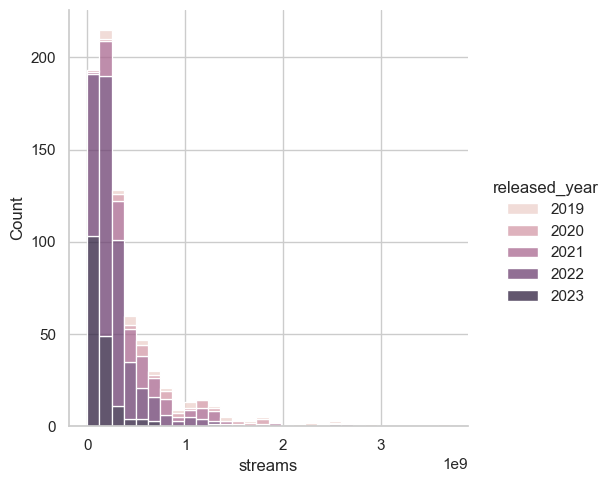

In [33]:
sns.displot(df_new, x='streams', hue='released_year', multiple='stack', kind='hist', bins=30)
# Se visualiza que en las musicas que se lanzaron en el año 2022 y 2023 tuvieron transmisiones menores a los 100 millones en
# comparación a los que se lanzaron en los años anteriores que tuvieron hasta 3 millones de transmisiones

## Medidas de Dispersión

Ahora vamos analizar la cantidad de veces que estuvieron en la lista de exitos de Spotify para luego poder analizar si hay una correlación entre la cantidad de transmisiones, la cantidad de veces que estuvieron en la lista de exitos y los beats por minuto que tiene la musica

In [34]:
# Primero verificamos sus medidas centrales y su medidas de dispersión para tener una idea de los datos que tenemos
mean_charts = df_new['in_spotify_charts'].mean()
median_charts = df_new['in_spotify_charts'].median()
mode_charts = df_new['in_spotify_charts'].mode()

desv_std_charts = df_new['in_spotify_charts'].std()
q1_charts = df_new['in_spotify_charts'].quantile(q=0.25)
q3_charts = df_new['in_spotify_charts'].quantile(q=0.75)
min_val_charts = df_new['in_spotify_charts'].quantile(q=0)
max_val_charts = df_new['in_spotify_charts'].quantile(q=1.0)
iqr_charts = q3_charts - q1_charts

# Detección de OutLiers
min_limit_charts = q1_charts - 1.5 * iqr_charts
max_limit_charts = q3_charts + 1.5 * iqr_charts

# Impresión de las medidas centrales y de dispersión
print("Medidas centrales para 'in_spotify_charts':\n")
print("Media:", mean_charts)
print("Mediana:", median_charts)
print("Moda:\n", mode_charts)
print("\nMedidas de dispersión para 'in_spotify_charts':\n")
print("Desviación estándar:", desv_std_charts)
print("Primer cuartil (Q1):", q1_charts)
print("Tercer cuartil (Q3):", q3_charts)
print("Valor mínimo:", min_val_charts)
print("Valor máximo:", max_val_charts)
print("Rango intercuartílico (IQR):", iqr_charts)
print("Límite inferior (Outliers):", min_limit_charts)
print("Límite superior (Outliers):", max_limit_charts)

Medidas centrales para 'in_spotify_charts':

Media: 11.482444733420026
Mediana: 3.0
Moda:
 0    0
Name: in_spotify_charts, dtype: int64

Medidas de dispersión para 'in_spotify_charts':

Desviación estándar: 19.429024579191587
Primer cuartil (Q1): 0.0
Tercer cuartil (Q3): 15.0
Valor mínimo: 0.0
Valor máximo: 147.0
Rango intercuartílico (IQR): 15.0
Límite inferior (Outliers): -22.5
Límite superior (Outliers): 37.5


In [35]:
sns.set_theme()
sns.set(style="ticks", font_scale=0.5)

c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


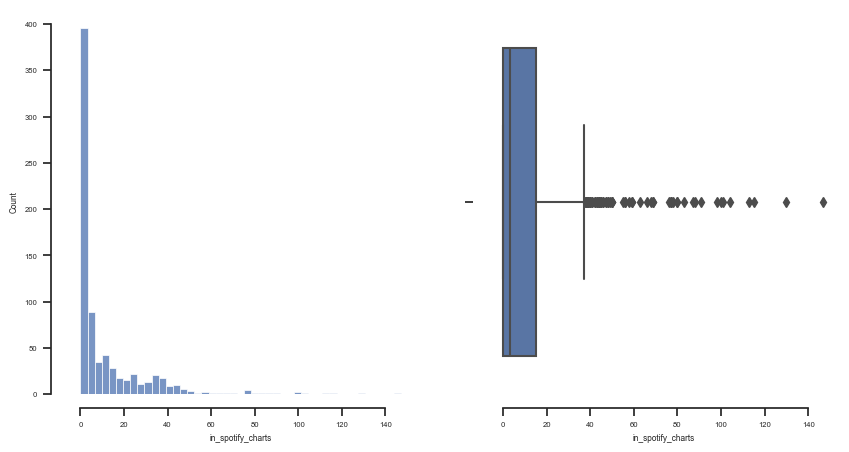

In [36]:
f, (ax_hist, ax_box) = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df_new, x='in_spotify_charts', ax=ax_hist)
sns.boxplot(data=df_new, x='in_spotify_charts', ax=ax_box)
sns.despine(offset=10, trim=True)
# como podemos observar en el gráfico existe varios datos anómalos en la data, mayormente la cantidad de veces en que las musicas
# llegan a la lista de exitos de spotify es de 0 a 20.

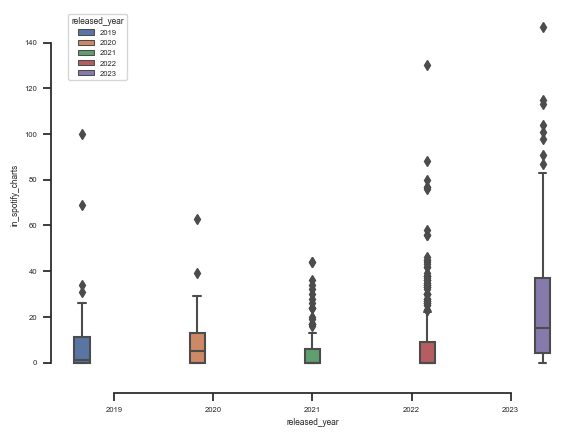

In [37]:
# Ahora veremos el comportamiento por año
sns.boxplot(data=df_new, y='in_spotify_charts', x='released_year', hue='released_year')
sns.despine(offset=10, trim=True)
# Podemos observar que en el año 2023 las musicas llegaron hasta 40 veces a la lista de exitos de Spotify

c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore

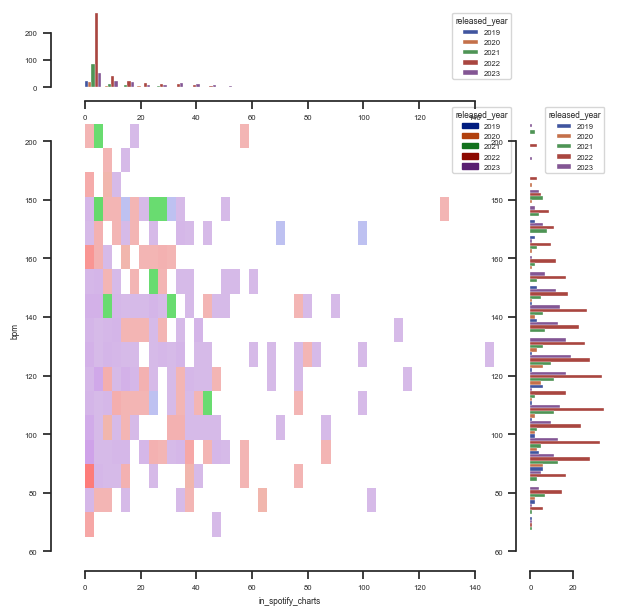

In [38]:
# Ahora veremos que tanto es la relación que tiene las veces que la musica estuvo en una lista de exito y los beats que tiene cada una de ellas.
sns.jointplot(data=df_new, x='in_spotify_charts', y='bpm', hue='released_year', palette='dark', kind='hist',
              marginal_kws=dict(bins= 25, fill = True, multiple= 'dodge', legend=True, palette='dark'))
sns.despine(offset=10, trim=True)

c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Proyectos\SpotifyHits_DescriptiveStats\.conda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Proyectos\SpotifyHits_Descriptive

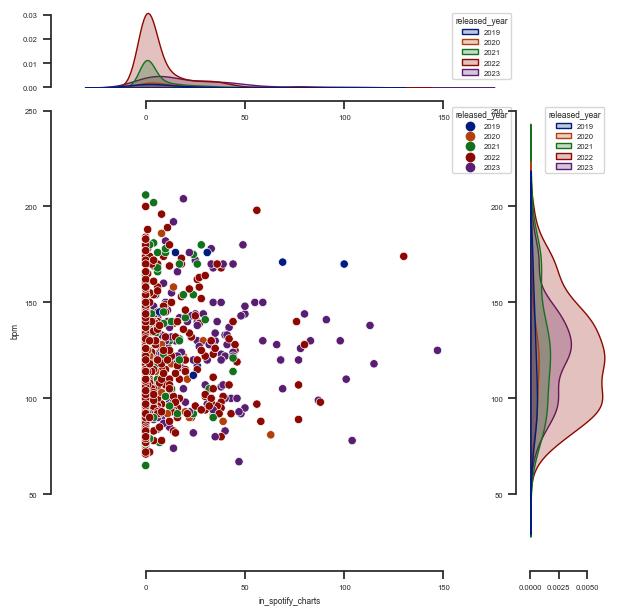

In [39]:
sns.jointplot(data=df_new, x='in_spotify_charts', y='bpm', hue='released_year', palette='dark', marginal_kws=dict(legend=True))
sns.despine(offset=10, trim=True)

Anteriormente vimos qu elas musicas del año 2023 eras las que se encontraban mas veces en la listas de éxitos de Spotify, y ahora observamos que estas músicas tienen entre 80 BPM y 180 BPM

## Escalamiento para Modelos de Machine Learning

### Escalamiento cuantitativo

#### Escalamiento lineal

In [40]:
# Realizaremos 2 escalamiento para ver cual es más rápido
# Escalamiento max-min
max_streams = df_new['streams'].max()
min_streams = df_new['streams'].min()
max_min_streams = (2*df_new['streams']-max_streams-min_streams)/max_streams-min_streams

#Escalamiento Z-score
mean_streams = df_new['streams'].mean()
std_streams = df_new['streams'].std()
z_score_streams = (df_new['streams'] - mean_streams)/std_streams

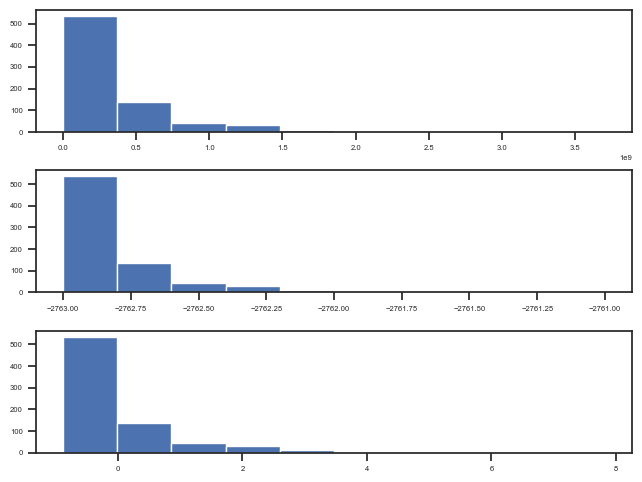

In [41]:
# Verificar escalamiento
f, ax = plt.subplots(3,1, tight_layout=True)
ax[0].hist(df_new['streams'])
ax[1].hist(max_min_streams)
ax[2].hist(z_score_streams)
plt.show()

In [42]:
# Verificamos la velocidad de cada escalamiento para saber cual elegir para el entrenamiento del modelo de Machien Learning
def train_streams():
    linear_model.LinearRegression().fit(df_new[['streams']], df_new['streams'])

def train_max_min_streams():
    linear_model.LinearRegression().fit(max_min_streams.values.reshape(-1, 1), df_new['streams'])

def train_z_score_streams():
    linear_model.LinearRegression().fit(z_score_streams.values.reshape(-1, 1), df_new['streams'])

In [43]:
stream_time = timeit.timeit(train_streams, number=100)
max_min_streams_time = timeit.timeit(train_max_min_streams, number=100)
z_score_stream_time = timeit.timeit(train_z_score_streams, number=100)

print('Tiempo de entrenamiento para streams: ', stream_time)
print('Tiempo de entrenamiento para max_min_streams: ', max_min_streams_time)
print('Tiempo de entrenamiento para z_score_stream: ', z_score_stream_time)

Tiempo de entrenamiento para streams:  0.22579829999995127
Tiempo de entrenamiento para max_min_streams:  0.05735840000124881
Tiempo de entrenamiento para z_score_stream:  0.07098320000113745


#### Escalamiento no lineal

In [44]:
df_new.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: >

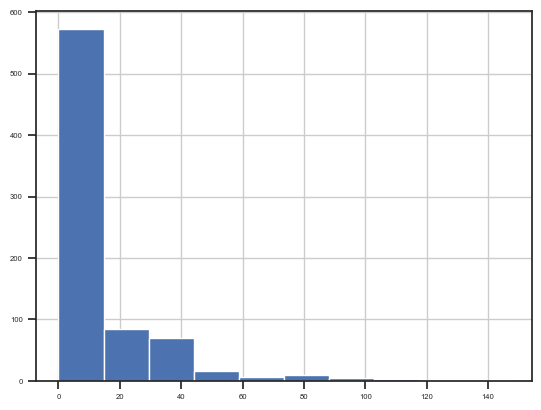

In [45]:
# El escalamiento no lineal se hace para variables no simétricas o sesgadas como esta
df_new.in_spotify_charts.hist()

<Axes: >

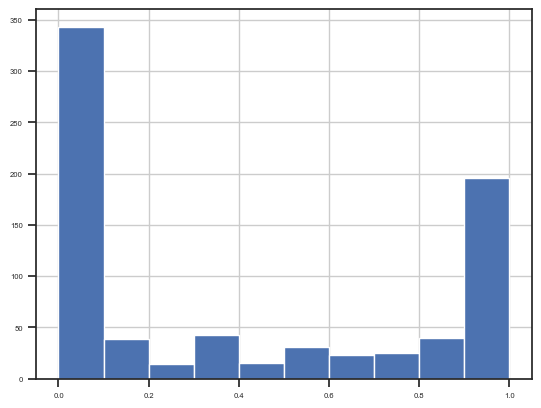

In [46]:
# Buscamos p para suavisar la linea de función
p=10
df_new.in_spotify_charts.apply(lambda x: np.tanh(x/p)).hist()

## Correlación

In [47]:
# Verificaremos la relación que hay entre las variables más importantes

columnas_categoricas = ['artist(s)_name', 'key', 'mode']
columnas_numericas = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Se transforma a datos numéricos las columnas categoricas
encoder = LabelEncoder()
df_encoded = df_new[columnas_categoricas].apply(encoder.fit_transform)

# Se escala las columnas
scaler = StandardScaler()
df_categoricas_escaladas = scaler.fit_transform(df_encoded)
df_numericas_escaladas = scaler.fit_transform(df_new[columnas_numericas])

# Se combina el escalamiento y se crea un dataframe
scaled_df = pd.concat([pd.DataFrame(df_categoricas_escaladas, columns=columnas_categoricas),
                       pd.DataFrame(df_numericas_escaladas, columns=columnas_numericas)], axis=1)

# Calcular la matriz de correlación
correlation_matrix = scaled_df.corr()

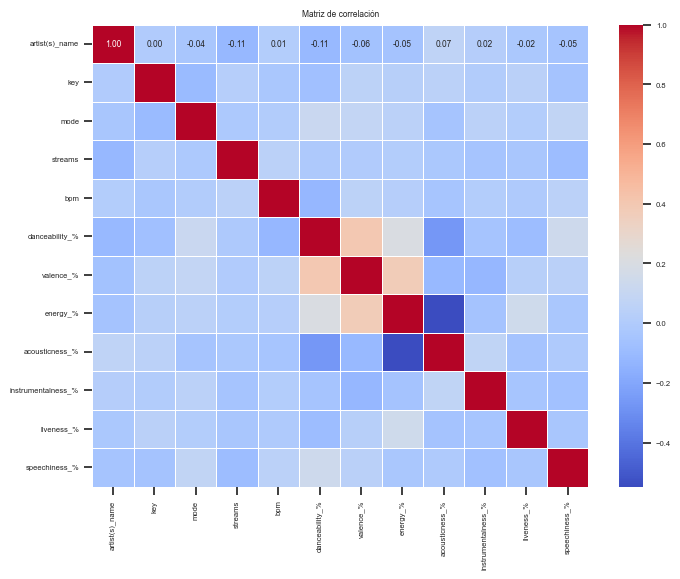

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

### Conclusiones de la correlación

1. Correlación Positiva:

Hay una correlación positiva entre 'valence_%' y 'energy_%' con un valor de 0.377416. Esto sugiere que las canciones con un mayor nivel de valencia también tienden a tener un mayor nivel de energía.

2. Correlación Negativa:

Hay una correlación negativa entre 'energy_%' y 'acousticness_%' con un valor de -0.547103. Esto sugiere que las canciones con un mayor nivel de energía tienden a tener un menor nivel de acústica.

3. Correlación Cercana a Cero:

Se descarta una de las hipotesis, 'streams' y 'bpm' es bastante baja (0.048530), lo que sugiere que no hay una relación lineal fuerte entre el número de streams y el tempo de la canción.

4. Correlación entre Variables Categóricas:

Hay una correlación negativa entre 'artist(s)_name' y 'streams' (-0.113883), lo que sugiere que ciertos artistas pueden tener menos streams en comparación con otros.

5. Correlación entre Variables Numéricas y Categóricas:

Hay una correlación positiva entre 'mode' y 'danceability_%' (0.113425), lo que sugiere que ciertos modos musicales pueden estar asociados con una mayor danceability en las canciones.

## PCA o Analisis de Componentes principales

Ahora que ya sabemos la correlación que hay entre las variables, y las conclusiones, el PCA nos ayudara a una reducción de dimensionalidad para un futuro proyecto de machine learning

In [49]:
# En este caso vemos que 'valence_%' y 'energy_% nos pueden brindar la misma información, asi que los reduciremos a un dimensión, para ello usaremos PCA
eigen_values, eigen_vectors = np.linalg.eig(correlation_matrix)

In [50]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i / sum(eigen_values)) * 100)

variance_explained.sort()
print(variance_explained)
# Aca puedo observar que podria sacrificar hasta 7.5% de la varianza total, asi puedo reducir 2 dimensiones del 2.7% y del 4.8% de la varianza

[2.7070937229931475, 4.872009313392949, 6.3603472906078835, 6.859114566519546, 7.65041341878911, 8.167424828944993, 8.41470223921959, 8.804569182024501, 9.131833515580698, 9.378452209340237, 10.629602649262635, 17.024437063324708]


In [51]:
# Seleccionar solo las columnas de interés
columnas_de_interes = ['valence_%', 'energy_%']
columnas_seleccionadas = scaled_df[columnas_de_interes]

# Inicializar y ajustar el modelo PCA
pca = PCA(n_components=1)
pca.fit(columnas_seleccionadas)

PCA(n_components=1)

In [52]:
pca.explained_variance_ratio_

array([0.68870807])

In [53]:
reduced_scaled = pca.transform(columnas_seleccionadas)

In [54]:
# Convertir el resultado de reduced_scaled a un DataFrame
reduced_scaled_df = pd.DataFrame(reduced_scaled, columns=[f'PCA_{i+1}' for i in range(1)])  # Nombrar las nuevas columnas

# Concatenar el DataFrame original con las columnas reducidas por PCA
df_new = pd.concat([df_new, reduced_scaled_df], axis=1)

## Conclusion

Ahora las columnas 'valence_%', 'energy_%' forman la columnas PCA_1, esta columna nos brinda la misma información, patrones y comportamientos que esas dos dimensiones, lo que nos va a ayudar para el entrenamiento del futuro modelo machine learning que haremos